In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from numpy import genfromtxt
from diff_tvr import *

In [2]:
import numpy as np
from numpy.linalg import lstsq

ramp = lambda u: np.maximum( u, 0 )
step = lambda u: ( u > 0 ).astype(float)

def SegmentedLinearReg( X, Y, breakpoints ):
    nIterationMax = 10

    breakpoints = np.sort( np.array(breakpoints) )

    dt = np.min( np.diff(X) )
    ones = np.ones_like(X)

    for i in range( nIterationMax ):
        # Linear regression:  solve A*p = Y
        Rk = [ramp( X - xk ) for xk in breakpoints ]
        Sk = [step( X - xk ) for xk in breakpoints ]
        A = np.array([ ones, X ] + Rk + Sk )
        p =  lstsq(A.transpose(), Y, rcond=None)[0] 

        # Parameters identification:
        a, b = p[0:2]
        ck = p[ 2:2+len(breakpoints) ]
        dk = p[ 2+len(breakpoints): ]

        # Estimation of the next break-points:
        newBreakpoints = breakpoints - dk/ck 

        # Stop condition
        if np.max(np.abs(newBreakpoints - breakpoints)) < dt/5:
            break

        breakpoints = newBreakpoints
    else:
        print( 'maximum iteration reached' )

    # Compute the final segmented fit:
    Xsolution = np.insert( np.append( breakpoints, max(X) ), 0, min(X) )
    ones =  np.ones_like(Xsolution) 
    Rk = [ c*ramp( Xsolution - x0 ) for x0, c in zip(breakpoints, ck) ]

    Ysolution = a*ones + b*Xsolution + np.sum( Rk, axis=0 )

    return Xsolution, Ysolution

In [3]:
import matplotlib.pyplot as plt

X = np.arange(0,180)
Y = student_1_strain[7,:]
plt.plot( X, Y, '--' );

initialBreakpoints = [40,60]
plt.plot( *SegmentedLinearReg( X, Y, initialBreakpoints ), '-r' );
plt.xlabel('X'); plt.ylabel('Y')

NameError: name 'student_1_strain' is not defined

In [4]:
student_1_strain_ref = np.zeros([12,179])
student_1_strain_rate_ref = np.zeros([12,179])

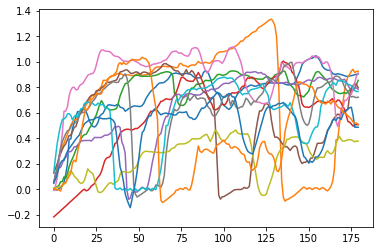

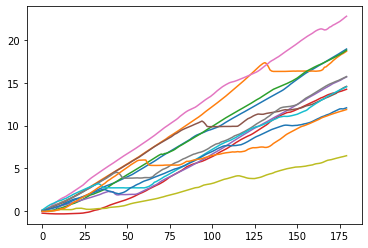

In [5]:
student_1_force = np.zeros([12,180])
student_1_strain = np.zeros([12,180])

for i in range(12):
    student_1_force[i,:] = genfromtxt('./data/student_1_force_'+str(i+1)+'.csv', delimiter=',')
    student_1_strain[i,:] = genfromtxt('./data/student_1_strain_'+str(i+1)+'.csv', delimiter=',')

for i in range(12):
    plt.plot(student_1_force[i,:])
plt.show()
    
for i in range(12):
    plt.plot(student_1_strain[i,:])
plt.show()
    

# plt.plot(force); plt.grid(); plt.title('Actual force'); plt.show()
# plt.plot(strain); plt.grid(); plt.title('Continuous strain (inferred by plant inversion)'); plt.show()

In [ ]:
# Fit the linear segment of strain curve
cut = 0
strain_ref, strain_rate_ref = get_reference(student_1_strain[cut,:],25,180)

plt.plot(student_1_strain[cut,:],label='actual')
plt.plot(strain_ref,'--')
plt.title('Strain reference')
plt.legend()
plt.show()

plt.plot(strain_rate_ref)
plt.title('Strain rate reference')
plt.show()

student_1_strain_ref[cut,:] = strain_ref
student_1_strain_rate_ref[cut,:] = strain_rate_ref

Text(0, 0.5, 'Y')

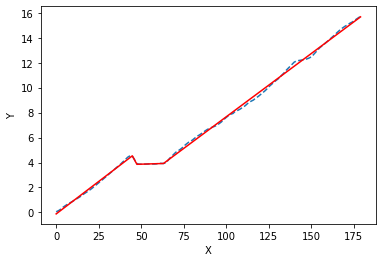

In [14]:
X = np.arange(0,180)
Y = student_1_strain[7,:]
plt.plot( X, Y, '--' );

initialBreakpoints = [40,50,60]
plt.plot( *SegmentedLinearReg( X, Y, initialBreakpoints ), '-r' );
plt.xlabel('X'); plt.ylabel('Y')

In [15]:
SegmentedLinearReg( X, Y, initialBreakpoints )

(array([  0.        ,  44.78488064,  47.47724049,  63.12603497,
        179.        ]),
 array([-0.11652176,  4.53629455,  3.85771893,  3.92396144, 15.66860884]))